In [1]:
import mysql.connector
import pandas as pd

print("Librairies chargées avec succès !")


Librairies chargées avec succès !


In [6]:
import mysql.connector

db_config = {
    "host": "127.0.0.1",
    "user": "user",
    "password": "password",
    "database": "chinook",
    "port": 3308
}

def get_connection():
    return mysql.connector.connect(**db_config)

# test
try:
    conn = get_connection()
    print("Connexion test OK ✅")
    conn.close()
except Exception as e:
    print("Erreur de connexion ❌ :", e)


Connexion test OK ✅


In [8]:
tables = ["Artist", "Album", "Genre", "MediaType", "Track"]

rows = []
try:
    conn = get_connection()
    cursor = conn.cursor(dictionary=True)

    for t in tables:
        cursor.execute(f"SELECT COUNT(*) AS n FROM {t}")
        n = cursor.fetchone()["n"]
        rows.append({"Table": t, "Nombre de lignes": n})

    cursor.close()
    conn.close()

    import pandas as pd
    pd.DataFrame(rows)

except Exception as e:
    print("❌ Erreur :", e)


In [9]:
import pandas as pd
df_counts = pd.DataFrame(rows)
df_counts


,Table,Nombre de lignes
0,Artist,8
1,Album,10
2,Genre,5
3,MediaType,3
4,Track,12


In [10]:
with get_connection() as conn:
    sql = """
    SELECT a.Name AS Artiste,
           al.AlbumId,
           al.Title AS Album
    FROM Artist a
    JOIN Album al ON a.ArtistId = al.ArtistId
    ORDER BY a.Name, al.Title;
    """
    df_albums = pd.read_sql(sql, conn)

df_albums


C:\Users\dinay\AppData\Local\Temp\ipykernel_25048\2720973364.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_albums = pd.read_sql(sql, conn)


,Artiste,AlbumId,Album
0,AC/DC,2,Back in Black
1,AC/DC,1,For Those About To Rock We Salute You
2,Accept,3,Balls to the Wall
3,Accept,4,Restless and Wild
4,Aerosmith,5,Big Ones
5,Metallica,6,Master of Puppets
6,Nirvana,8,Nevermind
7,Pink Floyd,9,The Dark Side of the Moon
8,Queen,7,A Night at the Opera
9,The Beatles,10,Abbey Road


In [11]:
with get_connection() as conn:
    sql = """
    SELECT t.TrackId,
           t.Name AS Piste,
           al.Title AS Album,
           g.Name AS Genre,
           t.UnitPrice,
           t.Milliseconds
    FROM Track t
    JOIN Album al ON t.AlbumId = al.AlbumId
    JOIN Genre g ON t.GenreId = g.GenreId
    ORDER BY t.TrackId
    LIMIT 20;
    """
    df_tracks = pd.read_sql(sql, conn)

df_tracks


C:\Users\dinay\AppData\Local\Temp\ipykernel_25048\2908706359.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_tracks = pd.read_sql(sql, conn)


,TrackId,Piste,Album,Genre,UnitPrice,Milliseconds
0,1,For Those About To Rock (We Salute You),For Those About To Rock We Salute You,Rock,0.99,343719
1,2,Put The Finger On You,For Those About To Rock We Salute You,Rock,0.99,205671
2,3,Back in Black,Back in Black,Rock,0.99,255001
3,4,Hells Bells,Back in Black,Rock,0.99,312000
4,5,Balls to the Wall,Balls to the Wall,Metal,0.99,342562
5,6,Fast As a Shark,Restless and Wild,Metal,0.99,230619
6,7,Walk This Way,Big Ones,Rock,0.99,210000
7,8,Dream On,Big Ones,Rock,0.99,270000
8,9,Master of Puppets,Master of Puppets,Metal,0.99,515000
9,10,Bohemian Rhapsody,A Night at the Opera,Pop,0.99,354000


C:\Users\dinay\AppData\Local\Temp\ipykernel_25048\3750958365.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_graph = pd.read_sql(sql, conn)


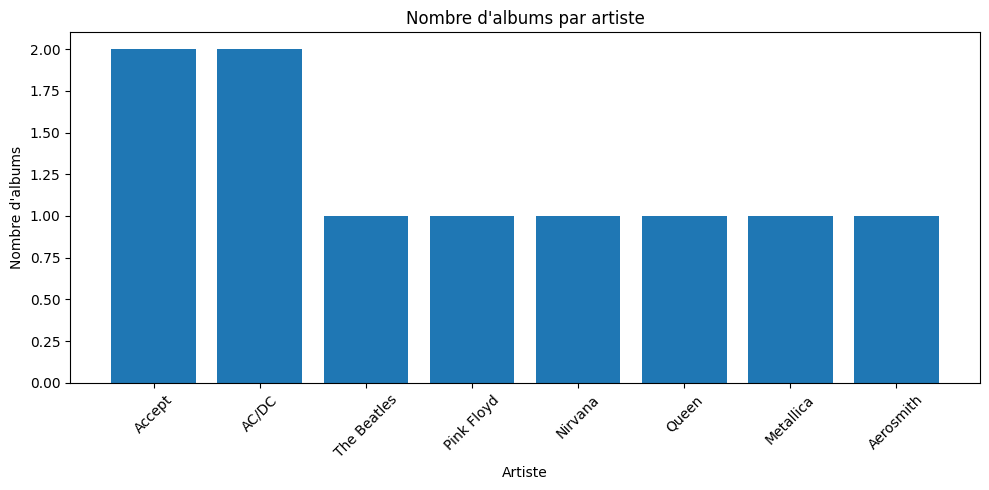

In [12]:
import matplotlib.pyplot as plt

# Récupérer les données depuis la base
with get_connection() as conn:
    sql = """
    SELECT a.Name AS Artiste,
           COUNT(al.AlbumId) AS Nombre_Albums
    FROM Artist a
    LEFT JOIN Album al ON a.ArtistId = al.ArtistId
    GROUP BY a.Name
    ORDER BY Nombre_Albums DESC;
    """
    df_graph = pd.read_sql(sql, conn)

# Affichage du graphe
plt.figure(figsize=(10, 5))
plt.bar(df_graph["Artiste"], df_graph["Nombre_Albums"])
plt.title("Nombre d'albums par artiste")
plt.xlabel("Artiste")
plt.ylabel("Nombre d'albums")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
